In [13]:
#EDA 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("complaints.csv")
df.head()



C:\Users\Dheeraj Reddy\AppData\Local\Temp\ipykernel_10160\1786649445.py:8: DtypeWarning: Columns (5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-09,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TN,38018,NaN,NaN,Web,2024-01-09,In progress,Yes,NaN,8129101
1,2023-12-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",AZ,864XX,NaN,Other,Web,2023-12-20,In progress,Yes,NaN,8034276
2,2023-12-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,76063,NaN,Other,Web,2023-12-29,In progress,Yes,NaN,8080735
3,2023-12-28,Debt collection,Federal student loan debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"Continental Services Group, Inc. d/b/a ConServe",SC,296XX,NaN,NaN,Web,2023-12-28,Closed with explanation,Yes,NaN,8071468
4,2024-01-01,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,31707,NaN,NaN,Web,2024-01-01,In progress,Yes,NaN,8085421


In [14]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    2163888
Debt collection                                                                  527728
Credit reporting or other personal consumer reports                              425142
Mortgage                                                                         390582
Credit card or prepaid card                                                      206375
Checking or savings account                                                      196671
Credit reporting                                                                 140429
Credit card                                                                      110940
Bank account or service                                                           86205
Student loan                                                                      82716
Money transfer, virtual currency, or money service                                63146
Vehicle loan or lease           

C:\Users\Dheeraj Reddy\AppData\Local\Temp\ipykernel_10160\2821273671.py:6: DtypeWarning: Columns (5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("complaints.csv")


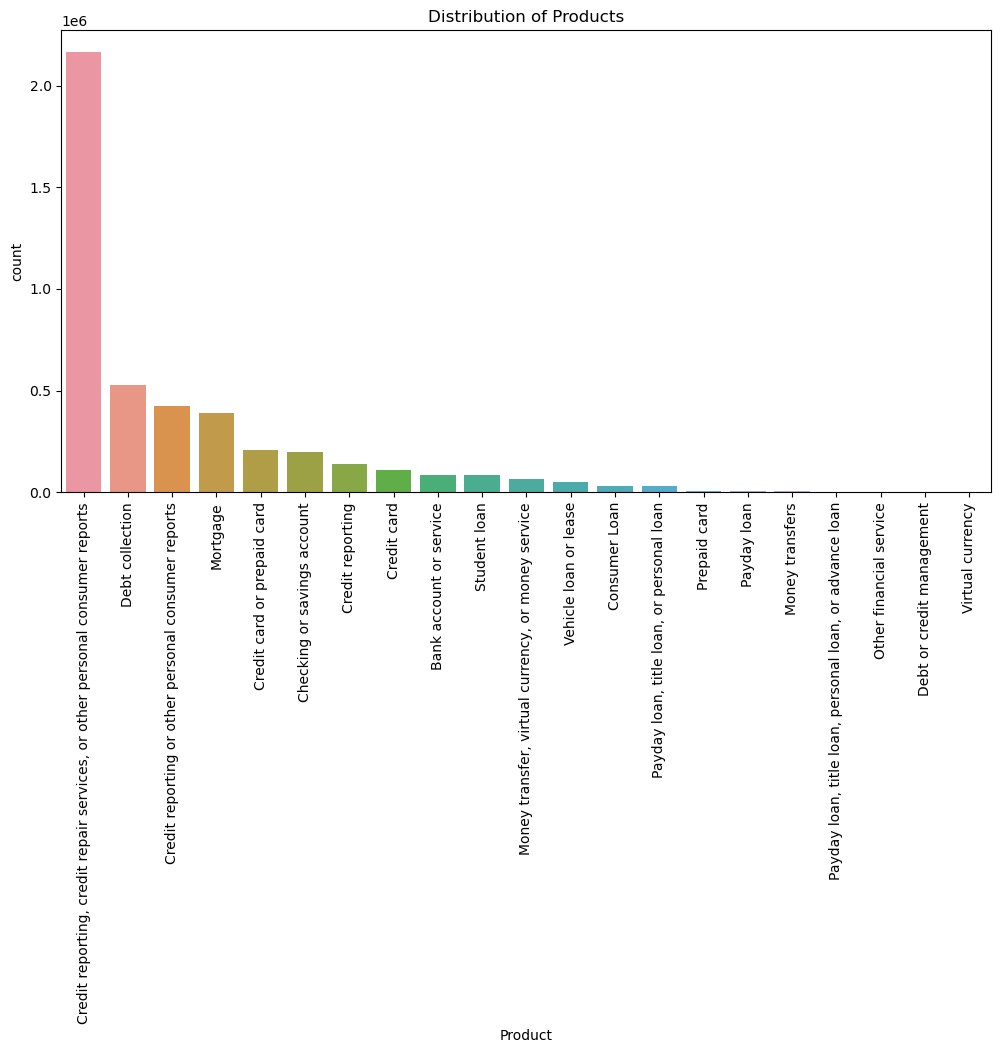

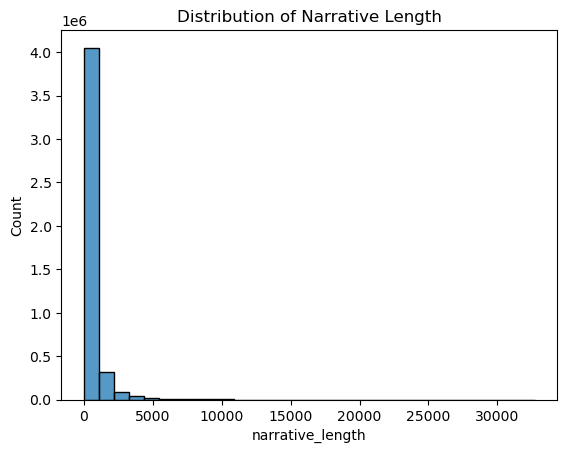

                                                        count        mean  \
Product                                                                     
Bank account or service                               86205.0  217.204443   
Checking or savings account                          196671.0  553.134128   
Consumer Loan                                         31575.0  334.535139   
Credit card                                          110940.0  276.273238   
Credit card or prepaid card                          206375.0  643.400208   
Credit reporting                                     140429.0  171.054718   
Credit reporting or other personal consumer rep...   425142.0  192.409364   
Credit reporting, credit repair services, or ot...  2163888.0  333.331525   
Debt collection                                      527728.0  419.079914   
Debt or credit management                               467.0  395.852248   
Money transfer, virtual currency, or money service    63146.0  703.802030   

In [18]:
#EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("complaints.csv")  

# Explore unique categories in the 'Product' column
plt.figure(figsize=(12, 6))
sns.countplot(x='Product', data=df, order=df['Product'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Products')
plt.show()

# Explore the distribution of 'Consumer complaint narrative' length for each category
df['narrative_length'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x)))
sns.histplot(df['narrative_length'], bins=30)
plt.title('Distribution of Narrative Length')
plt.show()

# Display summary statistics for 'narrative_length' by category
print(df.groupby('Product')['narrative_length'].describe())


In [24]:
# Filtering on the Product categories with relevant number of samples. 
# The remaining categories will not be used in further analysis and classification models
train_test_df = df[(df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports') | \
                             (df['Product'] == 'Debt collection') | \
                             (df['Product'] == 'Mortgage') | \
                             (df['Product'] == 'Credit card or prepaid card') | \
                             (df['Product'] == 'Checking or savings account')
                            ]

In [25]:
# 80% training data
train_orig_df = train_test_df.groupby('Product').sample(frac=0.8, random_state=6)
print("Training data:")
print("Number of training samples: {}".format(len(train_orig_df)))
print("Samples by product group:\n{}".format(train_orig_df['Product'].value_counts()))

# 20% test data
test_orig_df = train_test_df.drop(train_orig_df.index)
print("\nTest data:")
print("Number of test samples: {}".format(len(test_orig_df)))
print("Samples by product group:\n{}".format(test_orig_df['Product'].value_counts()))

# re-index after sampling
train_orig_df = train_orig_df.reset_index(drop=True)
test_orig_df = test_orig_df.reset_index(drop=True)

Training data:
Number of training samples: 2788195
Samples by product group:
Credit reporting, credit repair services, or other personal consumer reports    1731110
Debt collection                                                                  422182
Mortgage                                                                         312466
Credit card or prepaid card                                                      165100
Checking or savings account                                                      157337
Name: Product, dtype: int64

Test data:
Number of test samples: 697049
Samples by product group:
Credit reporting, credit repair services, or other personal consumer reports    432778
Debt collection                                                                 105546
Mortgage                                                                         78116
Credit card or prepaid card                                                      41275
Checking or savings account           

In [30]:
def prepare_data(df):
    # only the text column and the target label *Product* are needed
    df_out = df[['Consumer complaint narrative', 'Product']].reset_index(drop=True)
    # rename to the identifiers expected by Watson NLP
    df_out = df_out.rename(columns={"Consumer complaint narrative": "text", 'Product': 'labels'})
    # the label column should be an array (although we have only one label per complaint)
    df_out['labels'] = df_out['labels'].map(lambda label: [label,])
    return df_out
    
train_df = prepare_data(train_orig_df)
train_file = './train_data.json'
train_df.to_json(train_file, orient='records')
    
test_df = prepare_data(test_orig_df)
test_file = './test_data.json'
test_df.to_json(test_file, orient='records')

train_df.head()

,text,labels
0,NaN,[Checking or savings account]
1,NaN,[Checking or savings account]
2,I made a deposit into a US Bank branch in XXXX...,[Checking or savings account]
3,NaN,[Checking or savings account]
4,"Navy Federal, I still practicing non-faith act...",[Checking or savings account]


In [27]:
test_df.explode('labels')

,text,labels
0,NaN,Debt collection
1,NaN,Debt collection
2,NaN,Mortgage
3,NaN,Mortgage
4,NaN,Mortgage
...,...,...
697044,NaN,"Credit reporting, credit repair services, or o..."
697045,NaN,"Credit reporting, credit repair services, or o..."
697046,NaN,"Credit reporting, credit repair services, or o..."
697047,NaN,"Credit reporting, credit repair services, or o..."


In [7]:
df = df[['Consumer complaint narrative','Product']]
df.shape

(4528267, 2)

In [10]:
#remove null values
df = df[df["Consumer complaint narrative"].notnull() == True]

In [11]:
# converting label into intergar value 
df["category_id"] = df["Product"].factorize()[0]

In [14]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,Product,category_id
11,Credit card,0
12,Credit reporting or other personal consumer re...,1
120,Mortgage,2
175,Student loan,3
276,Checking or savings account,4
410,Debt collection,5
1150,"Money transfer, virtual currency, or money ser...",6
1197,"Payday loan, title loan, personal loan, or adv...",7
1705,"Credit reporting, credit repair services, or o...",8
3876,Vehicle loan or lease,9


In [13]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [15]:
df.head()

,Consumer complaint narrative,Product,category_id
11,See the attached documents. I want the bureau ...,Credit card,0
12,Someone stole my identity at XXXX XXXX and mad...,Credit reporting or other personal consumer re...,1
60,I am formally requesting this letter to update...,Credit reporting or other personal consumer re...,1
75,I recently reviewed a copy of my credit report...,Credit reporting or other personal consumer re...,1
95,There are UNAUTHORIZED and FRAUDULENT inquiry ...,Credit reporting or other personal consumer re...,1


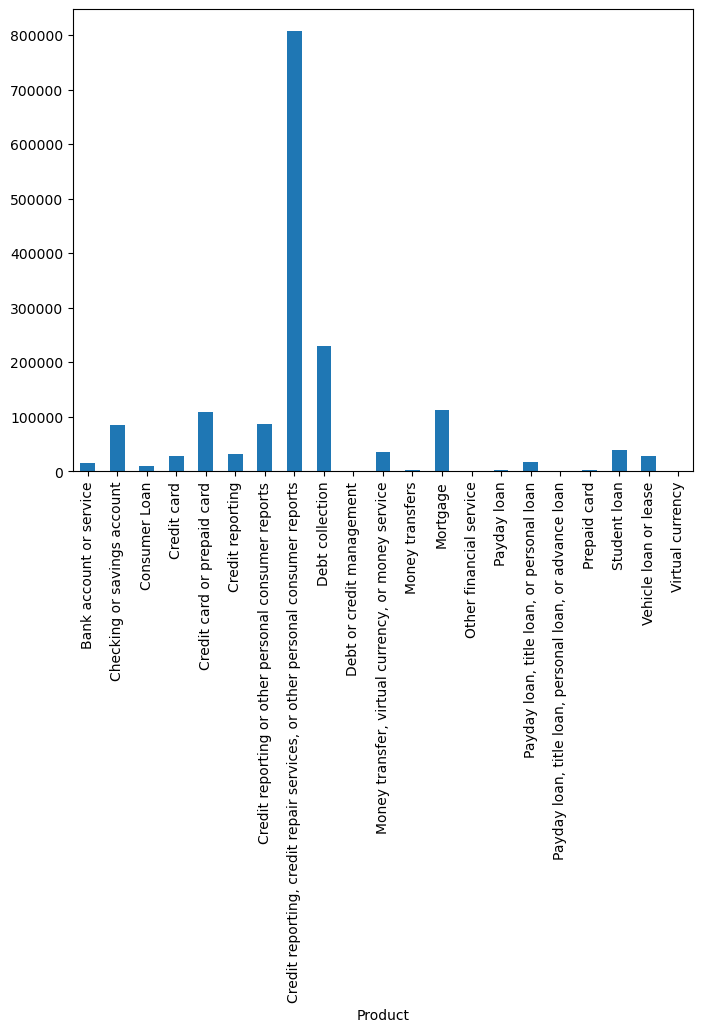

In [16]:
#checking the class distribustion 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product')["Consumer complaint narrative"].count().plot.bar(ylim=0)
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

3. Selection of Multi Classification model is done using Bi-LSTM 

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170   
max_words = 2500   


In [33]:
model.compile(loss = 'binary_crossentropy', optimizer='RMSProp', metrics = ['accuracy'])  

In [36]:
from sklearn.model_selection import train_test_split

# Train-Test Splitting
train_data, test_data = train_test_split(df, test_size = 0.20)

In [37]:
train_data.shape, test_data.shape

((1312729, 3), (328183, 3))

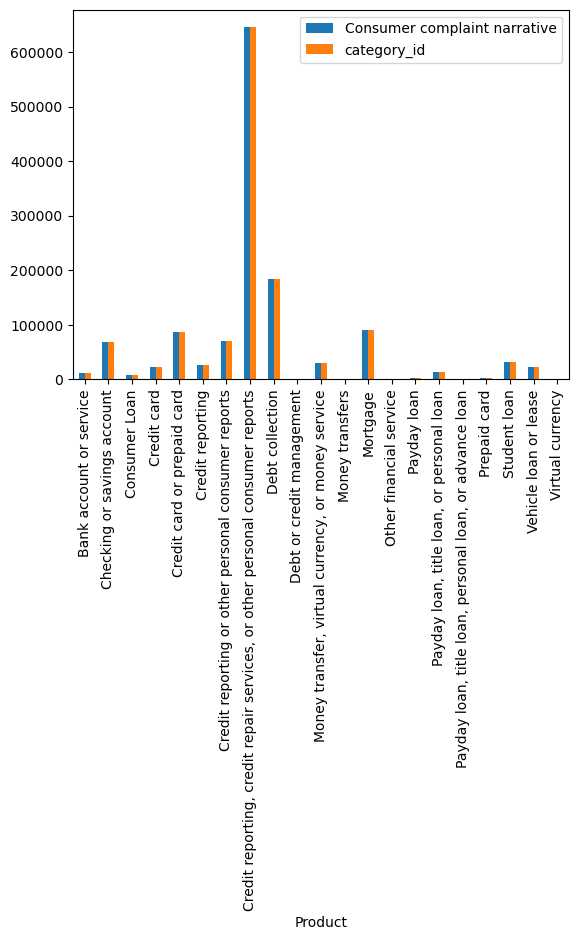

In [39]:
train_data.groupby('Product').count().plot(kind='bar')
plt.show()

In [69]:
# Declaring train labels
train_labels = train_data['Product'] 
test_labels = test_data['Product']

In [70]:
# Converting labels to numerical features
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['Bank account or service' 'Checking or savings account' 'Consumer Loan'
 'Credit card' 'Credit card or prepaid card' 'Credit reporting'
 'Credit reporting or other personal consumer reports'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Debt collection' 'Debt or credit management'
 'Money transfer, virtual currency, or money service' 'Money transfers'
 'Mortgage' 'Other financial service' 'Payday loan'
 'Payday loan, title loan, or personal loan'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan' 'Vehicle loan or lease' 'Virtual currency']
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array([ 11923,  67708,   7512,  22851,  87168,  25340,  69246, 645346,
       184146,    174,  28993,   1184,  89644,    228,   1411,  13748,
          819,   1832,  31235,  22208,     13], dtype=int64))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 1

In [71]:
# Changing labels to categorical features
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.array(test_labels))

In [72]:
#declaring the model. 
embedding_dim = 32  

In [73]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [74]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding 

In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170   
max_words = 2500   
embedding_dim = 32  

# Model Training
model = Sequential()
model.add(Embedding(max_words, 
                   embedding_dim,
                   input_length=max_sequence_length))

# Bidirectional LSTM 
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.4, recurrent_dropout=0)))   

model.add(GlobalMaxPool1D())

model.add(Dense(5,activation='softmax'))  

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 170, 32)           80000     
                                                                 
 bidirectional_9 (Bidirecti  (None, 170, 32)           6272      
 onal)                                                           
                                                                 
 global_max_pooling1d_9 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 86437 (337.64 KB)
Trainable params: 86437 (337.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model.compile(loss = 'binary_crossentropy', optimizer='RMSProp', metrics = ['accuracy'])

In [77]:
# Assuming your model is already compiled
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

# Assuming you have class weights defined
class_weight = {0: 4, 1: 5, 2: 3, 3: 3, 4: 4}

# Assuming your train_data, train_labels, test_data, and test_labels are NumPy arrays
# Make sure to replace these placeholders with your actual data

# Convert data and labels to NumPy arrays if they are not already
train_data_np = np.array(train_data)
train_labels_np = np.array(train_labels).astype(np.float32)  # Ensure labels are of type float32
test_data_np = np.array(test_data)
test_labels_np = np.array(test_labels).astype(np.float32)  # Ensure labels are of type float32

# Convert class weights to TensorFlow tensors
class_weight_tf = {k: tf.constant(v, dtype=tf.float32) for k, v in class_weight.items()}

# Train and validate the model
history = model.fit(train_data_np,train_labels_np,batch_size=48,epochs=20,class_weight=class_weight_tf,validation_data=(test_data_np, test_labels_np))


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
predicted_bi_lstm = model.predict(test_data)
predicted_bi_lstm

In [ ]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(test_labels, predicted_bi_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('################################')
print(sklearn.metrics.classification_report(test_labels, predicted_bi_lstm.round()))

In [ ]:
def accuracy_plot(history):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    fig.suptitle('Model Performance with Epochs', fontsize = 16)
    # Subplot 1 
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy', fontsize = 14)
    ax[0].set_xlabel('Epochs', fontsize = 12)
    ax[0].set_ylabel('Accuracy', fontsize = 12)
    ax[0].legend(['train', 'validation'], loc='best')
    
    # Subplot 2
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss', fontsize = 14)
    ax[1].set_xlabel('Epochs', fontsize = 12)
    ax[1].set_ylabel('Loss', fontsize = 12)
    ax[1].legend(['train', 'validation'], loc='best')
    
    
accuracy_plot(history)

In [ ]:
# Declaring function for plotting confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(model, test_data, test_labels):
    
    products = ['Credit Card', 'Credit Reporting', 'Debt Collection', 'Mortgages \nand Loans', 'Retail Banking']
        
    # Calculate predictions
    pred = model.predict(test_data)
    
    # Declaring confusion matrix
    cm = confusion_matrix(np.argmax(np.array(test_labels),axis=1), np.argmax(pred, axis=1))
    
    # Heat map labels

    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(5,5)

    # Plotting confusion matrix
    plt.figure(figsize=(12,8))
    
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=labels, annot_kws={"size": 15}, fmt = '',
                xticklabels = products,
                yticklabels = products)
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12, rotation = 'horizontal')
    plt.title('Confusion Matrix\n', fontsize=19)
    plt.xlabel('Predicted Labels', fontsize=17)
    plt.ylabel('Actual Labels', fontsize=17)
    
plot_cm(model, test_data, test_labels)